In [33]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

In [16]:
happy_path2015 = "2015.csv"
happy_df2015 = pd.read_csv(happy_path2015)

In [17]:
happy_path2016 = "2016.csv"
happy_df2016 = pd.read_csv(happy_path2016)

In [18]:
alco_path = 'alcohol.csv'
alco_df = pd.read_csv(alco_path)
alco_df = alco_df.loc[alco_df['Year'] ==2015]
alco_df=alco_df.rename(columns={"Entity":"Country"})

In [15]:
happy_alco = pd.merge(happy_df2015,alco_df, on="Country")
happy_alco

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,2015,11.58
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,2015,8.74
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,2015,10.36
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,2015,7.52
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,2015,8.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,RWA,2015,9.26
142,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,BEN,2015,2.97
143,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,SYR,2015,0.28
144,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,BDI,2015,7.03


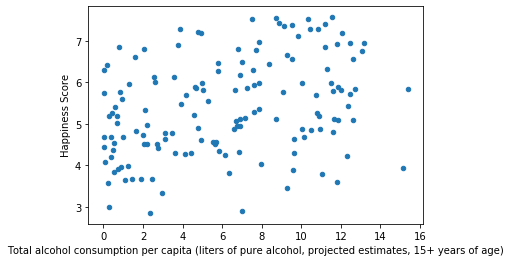

In [28]:
happy_alco.plot.scatter("Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",'Happiness Score')

R value is 0.7903220167261058


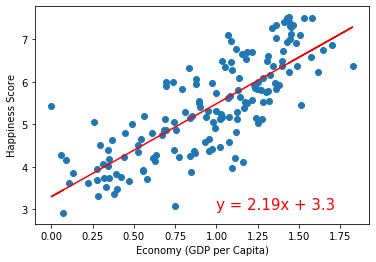

In [58]:
x_values = happy_df2016["Economy (GDP per Capita)"]
y_values = happy_df2016["Happiness Score"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.00,3),fontsize=15,color="red")
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
print(f"R value is {correlation[0]}")
#plt.savefig('happiness_vs_economy')
plt.show()

In [71]:
internet_path = 'Internet Usage.csv'
internet_df = pd.read_csv(internet_path)
internet_df=internet_df.dropna()
internet_df = internet_df.drop(['Series Name','Series Code'] ,axis=1)
internet_df = internet_df.rename(columns={"Country Name":"Country"})
happy_internet = pd.merge(happy_df2015,internet_df, on="Country")
happy_internet['Internet 2015']=pd.to_numeric(happy_internet['2015 [YR2015]'], errors='coerce')
happy_internet = happy_internet.drop('2015 [YR2015]', axis=1)
happy_internet= happy_internet.dropna()

R value is 0.7957739237373648


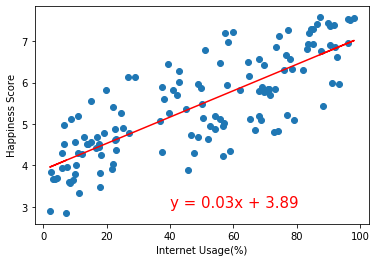

In [72]:
#happy_internet.plot.scatter('Internet 2015','Happiness Score')
x_values2 = happy_internet["Internet 2015"]
y_values2 = happy_internet["Happiness Score"]
correlation = st.pearsonr(x_values2,y_values2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values,"r-")
plt.annotate(line_eq,(40,3),fontsize=15,color="red")
plt.xlabel('Internet Usage(%)')
plt.ylabel('Happiness Score')
print(f"R value is {correlation[0]}")
#plt.savefig('happiness_vs_internet')
plt.show()


In [93]:
happy_report_complete_path = 'happiness_report_complete.csv'
happy_report_complete_df = pd.read_csv(happy_report_complete_path)
happy_df2016.sort_values(by=['Happiness Score'], ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [115]:
happy_report_filtered_df = happy_report_complete_df.loc[(happy_report_complete_df['Country name']=="Denmark")|(happy_report_complete_df['Country name']=='China')|(happy_report_complete_df['Country name']=='United States')|(happy_report_complete_df['Country name']=='Russia')|(happy_report_complete_df['Country name']=='Afghanistan')]
happy_report_filtered_df = happy_report_filtered_df.iloc[: , [0, 1, 2]]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(happy_report_filtered_df)

       Country name  year  Life Ladder
361           China  2006     4.560495
362           China  2007     4.862862
363           China  2008     4.846295
364           China  2009     4.454361
365           China  2010     4.652737
366           China  2011     5.037208
367           China  2012     5.094917
368           China  2013     5.241090
369           China  2014     5.195619
370           China  2015     5.303878
371           China  2016     5.324956
372           China  2017     5.099061
373           China  2018     5.131434
374           China  2019     5.144120
375           China  2020     5.771065
376           China  2021     5.862864
477         Denmark  2005     8.018934
478         Denmark  2007     7.834233
479         Denmark  2008     7.970892
480         Denmark  2009     7.683359
481         Denmark  2010     7.770515
482         Denmark  2011     7.788232
483         Denmark  2012     7.519909
484         Denmark  2013     7.588607
485         Denmark  2014

/Users/joshuasamuel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [88]:
obesity_path = 'obesity.csv'
obesity_df = pd.read_csv(obesity_path)
obesity_df = obesity_df[['Location', 'Value','Period' ]]
obesity_df

,Location,Value,Period
0,Viet Nam,1.6 [0.8 – 2.8],2016
1,Uganda,1.8 [0.9 – 3.3],2016
2,Rwanda,1.9 [0.8 – 3.6],2016
3,Ethiopia,1.9 [0.8 – 3.7],2016
4,Thailand,10 [7.4 – 13.1],2016
...,...,...,...
24565,South Sudan,No data,1975
24566,South Sudan,No data,1975
24567,Sudan,No data,1975
24568,Sudan,No data,1975
